In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "-1"  # Set to 1 or the desired number of cores



In [12]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)  # Convert target to integer type
print(f"Shape of dataset: {X.shape}")


Shape of dataset: (70000, 784)


In [13]:
# Reduce dimensions to speed up k-Means using PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

print(f"Shape of dataset after PCA: {X_pca.shape}")


Shape of dataset after PCA: (70000, 50)


In [25]:
# Apply k-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_pca)

# Get the cluster labels
cluster_labels = kmeans.labels_


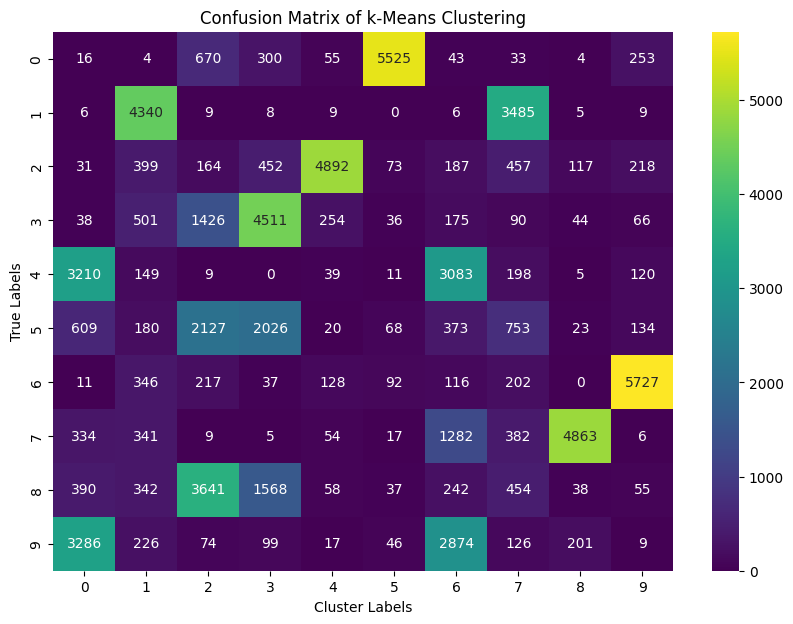

In [26]:
# Create a confusion matrix to compare the actual labels with the clustered labels
conf_mat = confusion_matrix(y, cluster_labels)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="viridis")
plt.title('Confusion Matrix of k-Means Clustering')
plt.xlabel('Cluster Labels')
plt.ylabel('True Labels')
plt.show()


In [27]:
# Print k-Means inertia
print(f'Inertia (Sum of squared distances to the nearest cluster center): {kmeans.inertia_}')


Inertia (Sum of squared distances to the nearest cluster center): 136962768173.80345


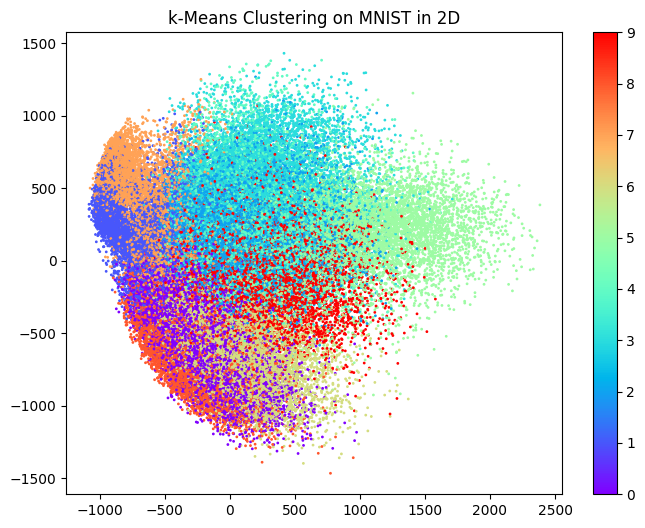

In [28]:
# Reduce dataset to 2D for visualization
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_pca)

# Plot the clustered data in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap='rainbow', s=1)
plt.colorbar()
plt.title('k-Means Clustering on MNIST in 2D')
plt.show()
